# Apple Music 播放清單分析

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.font_manager import FontProperties

# 建立中文字體屬性物件
chinese_font = FontProperties(fname='/System/Library/Fonts/PingFang.ttc')

# 設定全域字體為中文字體
mpl.rc('font', family='PingFang TC')
plt.rcParams['axes.unicode_minus'] = False  # 正確顯示負號

# 設定繪圖風格
sns.set(style="whitegrid", font_scale=1.1)

# 匯入播放清單（請將檔名改成你自己的 csv 檔案）
df = pd.read_csv("J.csv", encoding="utf-8")

# 檢查欄位
df.columns.tolist()

['名稱',
 '藝人',
 '作曲者',
 '專輯',
 '分類',
 '作品',
 '樂章編號',
 '樂章',
 '樂章名稱',
 '類型',
 '大小',
 '時間長度',
 '光碟編號',
 '光碟數量',
 '音軌編號',
 '音軌數量',
 '年份',
 '修改日期',
 '加入的日期',
 '位元率',
 '取樣頻率',
 '音量調整',
 '種類',
 '等化器',
 '註解',
 '播放次數',
 '最近播放',
 '略過次數',
 '上次略過的日期',
 '喜好程度',
 '位置']

## 資料清洗與基本統計

In [ ]:
artist_mapping = {
    'Mayday': '五月天',
    'Jay Chou': '周杰倫',
    'JJ Lin': '林俊傑',
    'Cosmos People': '宇宙人',
    'G.E.M.': '鄧紫棋',
    'Accusefive': '告五人',
    'Astro Bunny': '原子邦妮',
    'Qing Feng Wu': '吳青峰',
    'Yanzi Sun': '孫燕姿',
    'Yoga Lin': '林宥嘉',
    'Ann': '白安',
    '五月天 阿信': '五月天',
    'Jolin Tsai': '蔡依林',
    'JOLIN蔡依林': '蔡依林',
    'Ashin Chen': '五月天',
    'Jam Hsiao': '蕭敬騰',
    'Rainie Yang': '楊丞琳',
    'aMEI': '張惠妹',
    'Eric Chou': '周興哲',
    'sodagreen': '蘇打綠',
    'WeiBird': '韋禮安',
    'JOLIN': '蔡依林',
    'Khalil Fong': '方大同',
    'JOLIN蔡依林': '蔡依林',
}

# 替換藝人名稱
df['藝人'] = df['藝人'].replace(artist_mapping)

# 清理欄位（只保留有用資料）
df = df[['名稱', '藝人', '分類', '年份', '播放次數']].dropna(subset=['藝人'])

# 撥放次數補缺
df['播放次數'] = pd.to_numeric(df['播放次數'], errors='coerce').fillna(0).astype(int)

df.head()

,名稱,藝人,分類,年份,播放次數
0,Good Doctor Opening Theme(Inst. Ver),Niyari,NaN,2018,11
1,Hikari,androp,NaN,2018,18
2,馬と鹿,米津玄師,NaN,2019,1
3,海の幽霊,米津玄師,NaN,2019,2
4,Flamingo,米津玄師,NaN,2018,0


## 播放次數前 10 名藝人

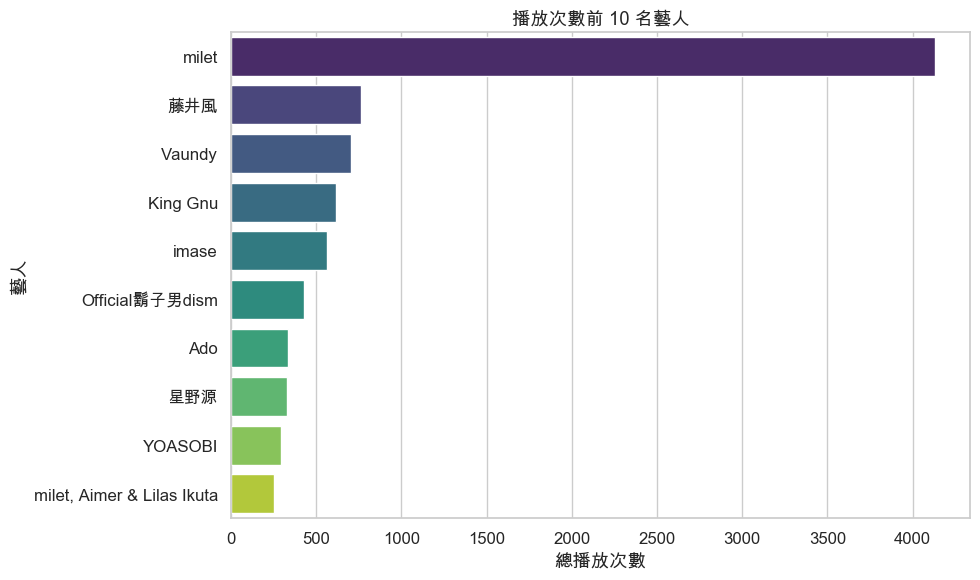

In [17]:
top_artists = (
    df.groupby('藝人')['播放次數']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC', 'Heiti TC', 'Microsoft JhengHei', 'Apple LiGothic'] 
plt.rcParams['axes.unicode_minus'] = False  # 正確顯示負號

plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, hue=top_artists.index, palette="viridis", legend=False)
plt.title("播放次數前 10 名藝人")
plt.xlabel("總播放次數")
plt.ylabel("藝人")
plt.tight_layout()
plt.show()

## 藝人歌曲佔比分析

/var/folders/21/6jz1rx190lzfy7c2trv66vsh0000gn/T/ipykernel_2005/453528741.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='藝人', y='歌曲數量', data=plot_data, palette="viridis")


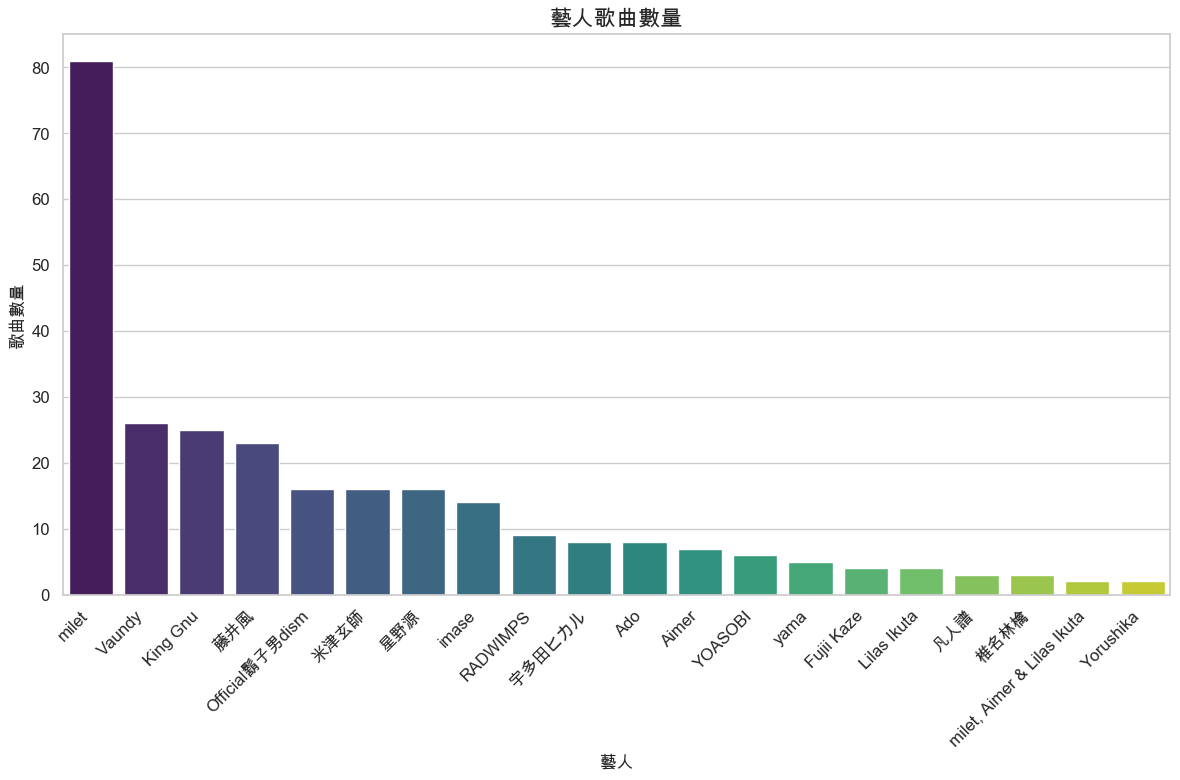


藝人歌曲數量 (顯示 20 位藝人):
milet: 81首歌 (24.7%)
Vaundy: 26首歌 (7.9%)
King Gnu: 25首歌 (7.6%)
藤井風: 23首歌 (7.0%)
Official鬍子男dism: 16首歌 (4.9%)
米津玄師: 16首歌 (4.9%)
星野源: 16首歌 (4.9%)
imase: 14首歌 (4.3%)
RADWIMPS: 9首歌 (2.7%)
宇多田ヒカル: 8首歌 (2.4%)
Ado: 8首歌 (2.4%)
Aimer: 7首歌 (2.1%)
YOASOBI: 6首歌 (1.8%)
yama: 5首歌 (1.5%)
Fujii Kaze: 4首歌 (1.2%)
Lilas Ikuta: 4首歌 (1.2%)
凡人譜: 3首歌 (0.9%)
椎名林檎: 3首歌 (0.9%)
milet, Aimer & Lilas Ikuta: 2首歌 (0.6%)
Yorushika: 2首歌 (0.6%)


In [18]:
# 計算每個藝人的歌曲數量
artist_counts = df['藝人'].value_counts()

# 設定要顯示的藝人數量
top_n = 20  # 可以修改為任何數字，例如20、30等，或設為 None 顯示全部

# 選擇藝人顯示
if top_n is not None:
    top_artists = artist_counts.head(top_n)
    # 將剩餘藝人歸類為「其他」
    # other_count = artist_counts.sum() - top_artists.sum()
    # if other_count > 0:
    #     top_artists['其他'] = other_count
else:
    # 顯示全部藝人
    top_artists = artist_counts

# 建立繪圖用的DataFrame
plot_data = pd.DataFrame({'藝人': top_artists.index, '歌曲數量': top_artists.values})

# 繪製藝人歌曲數量長條圖
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='藝人', y='歌曲數量', data=plot_data, palette="viridis")
plt.title("藝人歌曲數量", fontsize=16)
plt.xlabel("藝人", fontsize=12)
plt.ylabel("歌曲數量", fontsize=12)
plt.xticks(rotation=45, ha='right')  # 旋轉標籤以避免重疊
plt.tight_layout()
plt.show()

# 顯示藝人的歌曲數量與佔比
total_songs = len(df)
print(f"\n藝人歌曲數量 (顯示 {len(top_artists)-('其他' in top_artists.index)} 位藝人):")

# 不顯示「其他」類別的詳細資訊
artists_to_show = top_artists.index if top_n is None else top_artists.index[:-1] if '其他' in top_artists.index else top_artists.index
for artist in artists_to_show:
    if artist != '其他':
        percentage = (artist_counts[artist] / total_songs) * 100
        print(f"{artist}: {artist_counts[artist]}首歌 ({percentage:.1f}%)")

## 播放次數最多的前30首歌

/var/folders/21/6jz1rx190lzfy7c2trv66vsh0000gn/T/ipykernel_2005/3269059886.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='播放次數', y='名稱', data=top_songs, palette="viridis")


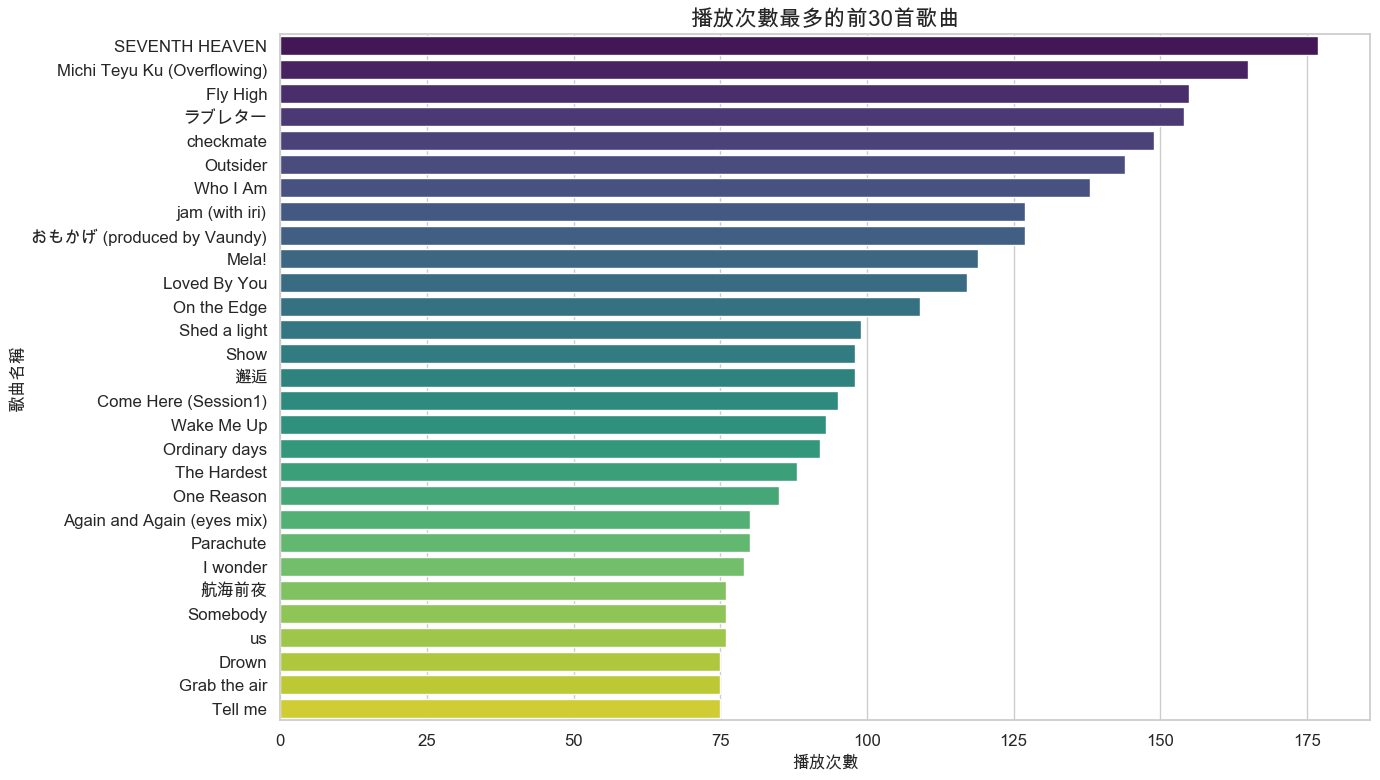


播放次數最多的前30首歌曲:
1. SEVENTH HEAVEN - milet: 177次
2. Michi Teyu Ku (Overflowing) - 藤井風: 165次
3. Fly High - milet: 155次
4. ラブレター - YOASOBI: 154次
5. checkmate - milet: 149次
6. Outsider - milet: 144次
7. Who I Am - milet: 138次
8. jam (with iri) - milet: 127次
9. おもかげ (produced by Vaundy) - milet, Aimer & Lilas Ikuta: 127次
10. おもかげ (produced by Vaundy) - milet, Aimer & Lilas Ikuta: 127次
11. Mela! - 緑黃色社會: 119次
12. Loved By You - milet: 117次
13. On the Edge - milet: 109次
14. Shed a light - milet: 99次
15. Show - Ado: 98次
16. 邂逅 - milet: 98次
17. Come Here (Session1) - milet: 95次
18. Wake Me Up - milet: 93次
19. Ordinary days - milet: 92次
20. The Hardest - milet: 88次
21. One Reason - milet: 85次
22. Again and Again (eyes mix) - milet: 80次
23. Parachute - milet: 80次
24. I wonder - Da-iCE: 79次
25. 航海前夜 - milet: 76次
26. Somebody - milet: 76次
27. us - milet: 76次
28. Drown - milet: 75次
29. Grab the air - milet: 75次
30. Tell me - milet: 75次


In [19]:
# 新增一個 Markdown 標題
## 播放次數最多的前20首歌曲

# 選取播放次數最多的前20首歌
top_songs = df.sort_values('播放次數', ascending=False).head(30)

# 設定字體避免中文顯示問題
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Apple LiGothic', 'Heiti TC', 'STHeiti'] 
plt.rcParams['axes.unicode_minus'] = False  # 正確顯示負號

# 繪製播放次數最多的前20首歌曲長條圖
plt.figure(figsize=(14, 8))
sns.barplot(x='播放次數', y='名稱', data=top_songs, palette="viridis")
plt.title("播放次數最多的前30首歌曲", fontsize=16)
plt.xlabel("播放次數", fontsize=12)
plt.ylabel("歌曲名稱", fontsize=12)
plt.tight_layout()
plt.show()

# 顯示詳細資訊
print("\n播放次數最多的前30首歌曲:")
for i, (name, artist, play_count) in enumerate(zip(top_songs['名稱'], top_songs['藝人'], top_songs['播放次數']), 1):
    print(f"{i}. {name} - {artist}: {play_count}次")

## 歌曲年份分布

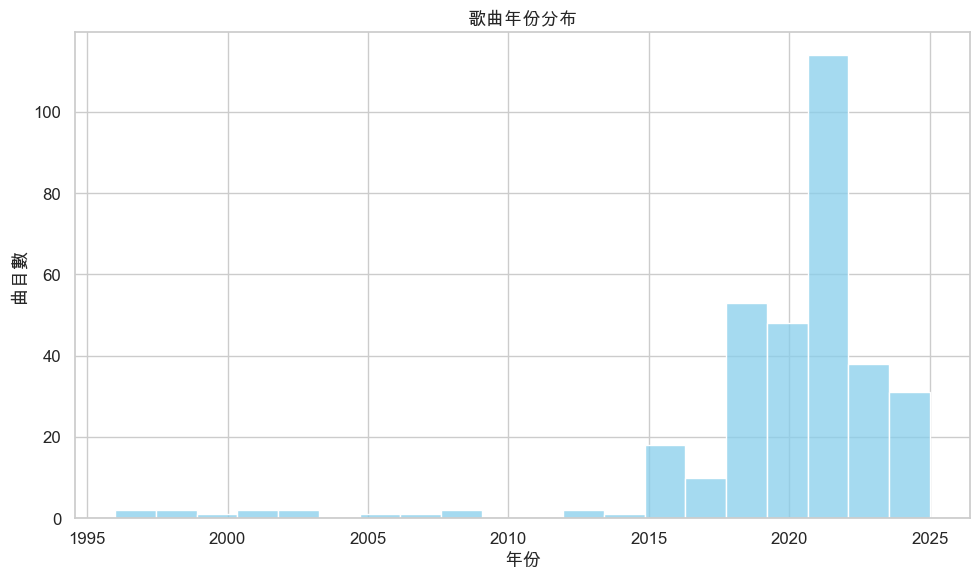

In [20]:
# 改用 Arial Unicode MS 字體，它通常在 Mac 上可用並支援中文字符
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Apple LiGothic', 'Heiti TC', 'STHeiti'] 
plt.rcParams['axes.unicode_minus'] = False  # 正確顯示負號

# 繪製歌曲年份分布圖
plt.figure(figsize=(10, 6))
sns.histplot(df['年份'].dropna(), bins=20, kde=False, color='skyblue')
plt.title("歌曲年份分布")
plt.xlabel("年份")
plt.ylabel("曲目數")
plt.tight_layout()
plt.show()